In [ ]:
# Exercise 5.3
# a)  
# 
# For k-fold cross validation we randomly divide training set into k groups of approximately equal size. The first fold is 
# considered as the validation set and the model is fit on the remaining k-1 groups.
# The MSE is calculated using the validation set. This procedure is repeated k times and on each time the combination of  
# the validation set and training set is different. We then take the average of all the MSE's as the final MSE. 
# 
# b) 
# 
# i. There is less variance in test error estimate and more accurate test error, because entire dataset is used.
  
# ii. There is computational advantage, since less computing resources are required. 
# With k equl to 10, only 10 models need to be fitted, when with LOOCV n models need fitting, 
# which can be sometimes a very big amount. The bias is higher than in LOOCV, as fewer observations are used, 
# but it tends to have lower variance. With k equal to 5 or 10 gives a test error estimate 
# that has neither high bias or variance, and so tends to give more accurate estimates in general.

In [ ]:
# Exercise 5.8

In [1]:
# a)

set.seed(1)
x=rnorm(100)
y=x-2*x^2+rnorm (100)

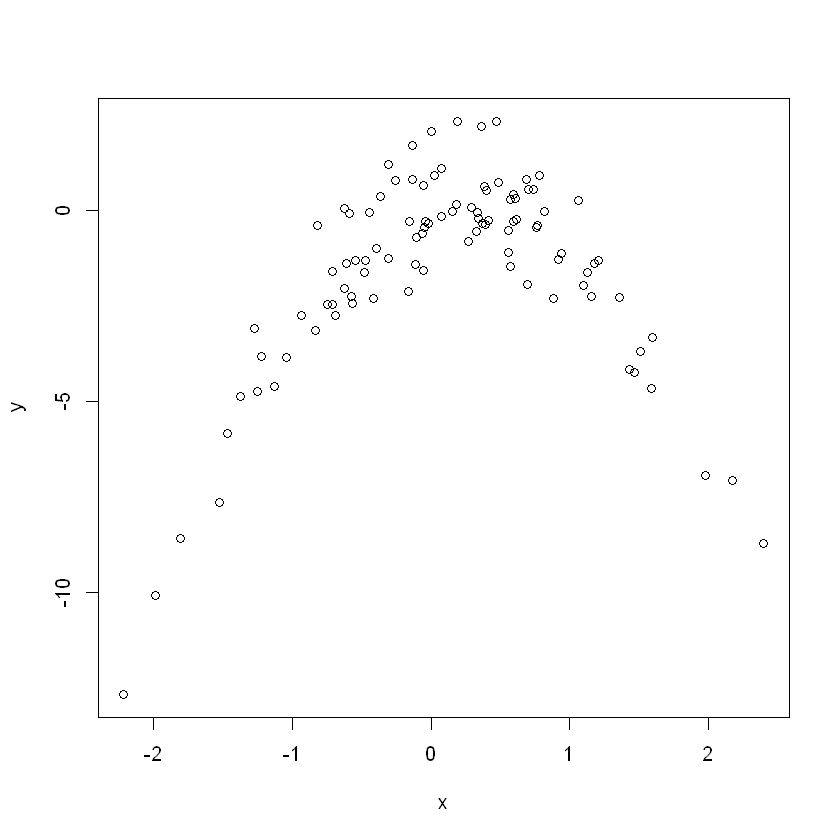

In [2]:
# b)

plot(x,y)

In [6]:
library(boot)

In [7]:
# c)

set.seed(11)
x = c(rnorm(100))
y = c(x-2*x^2+rnorm(100))
df = data.frame(x,y)
cv.err = rep(0,4)
for (i in 1:4){
  lr.fit = glm(y~poly(x,degree=i,raw=TRUE))
  cv.err[i] = cv.glm(df, lr.fit)$delta[1]
}
cv.err

[1] 6.630651 1.032469 1.090550 1.071305

[1] 6.9752118 0.9664678 1.0000174 0.9993215

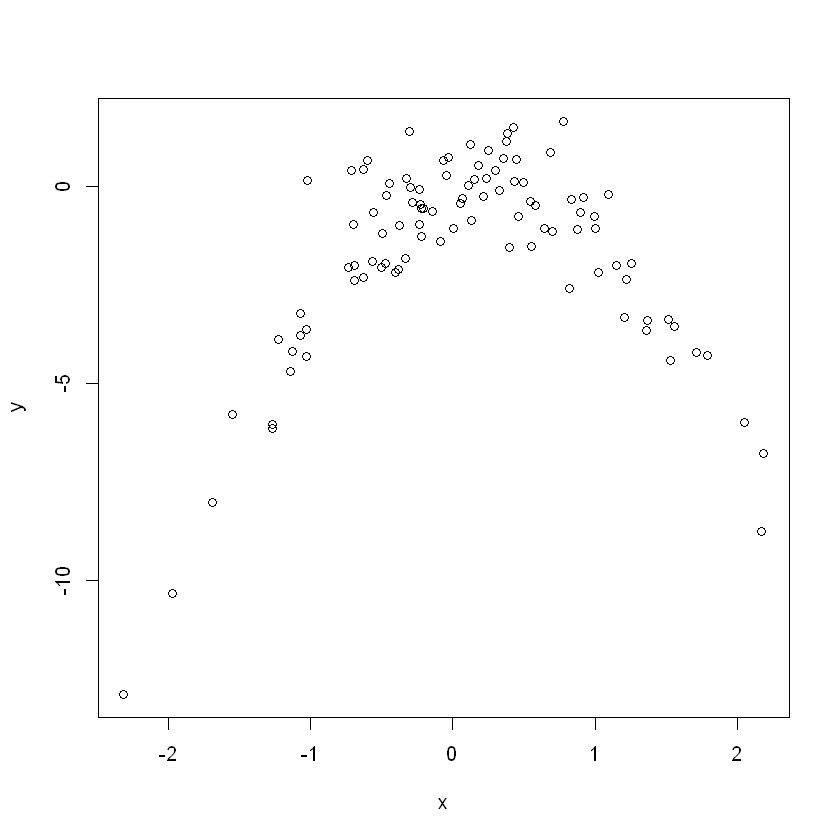

In [8]:
# d)

set.seed(123)
x = c(rnorm(100))
y = c(x-2*x^2+rnorm(100))
plot(x,y)
df = data.frame(x,y)
cv.err = rep(0,4)#
for (i in 1:4){
  lr.fit = glm(y~poly(x,degree=i,raw=TRUE))
  cv.err[i] = cv.glm(df, lr.fit)$delta[1]
}
cv.err

In [ ]:
# e)
# The model with the quadratic term and it was expected since the model looked qudratic in the b) step.

In [ ]:
# Exercise 6.1
# a) Best subset selection is the lowest training RSS because it fits models for every possible combination of predictors. 
# b) Best subset considers more models than the other two, and the best model found on the training set could also be the best one for a test set. 
# c) True. True. False. False.

In [ ]:
# Exercise 6.9

In [13]:
library(ISLR)
library(glmnet)
set.seed(2)
x = model.matrix(Apps~.,College)[,-1]
y = College$Apps
grid = 10^seq(10,-2,length=100)

train = sample(1:nrow(x), nrow(x)/1.3)
test = (-train)
y.test = y[test]

Loading required package: Matrix

Loaded glmnet 4.1-2



In [14]:
linear.model = glmnet(x[train,], y[train], alpha=0, lambda=grid, thresh=1e-12)
linear.pred = predict(linear.model, s=0, newx=x[test,],exact=T,x=x[train,],y=y[train])
mean((linear.pred-y.test)^2)

[1] 1367387

In [15]:
train.df = data.frame(College[train,])
test.df = data.frame(College[test,])

In [16]:
lm.fit = lm(Apps~., data=train.df)
lm.pred = predict(lm.fit, test.df, type=c("response"))
err.lm = mean((lm.pred-test.df$Apps)^2)
err.lm

[1] 1367393

In [17]:
cv.out = cv.glmnet(x[train,],y[train],alpha=0)
bestlam = cv.out$lambda.min
ridge.mod = glmnet(x[train,],y[train],alpha=0,lambda=grid, thresh=1e-12)
ridge.pred = predict(ridge.mod, s=bestlam, newx=x[test,])
err.ridge = mean((ridge.pred-y.test)^2)
err.ridge

[1] 1355876

In [ ]:
# Exercise 7.9


Call:
glm(formula = nox ~ poly(dis, 3), data = Boston)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.121130  -0.040619  -0.009738   0.023385   0.194904  

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.003852802)

    Null deviance: 6.7810  on 505  degrees of freedom
Residual deviance: 1.9341  on 502  degrees of freedom
AIC: -1370.9

Number of Fisher Scoring iterations: 2


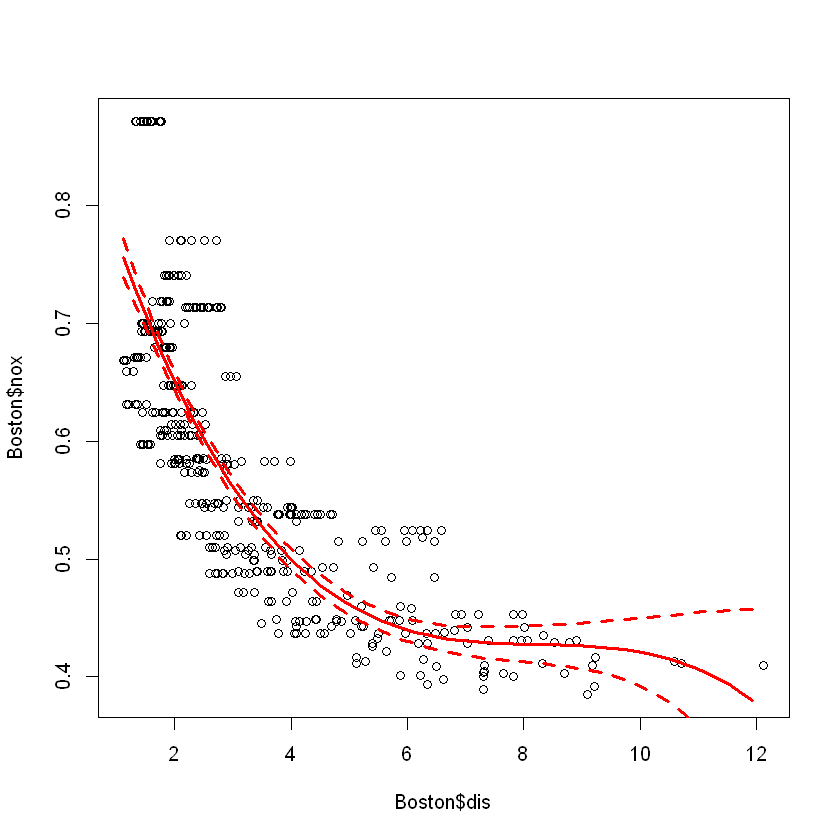

In [21]:
library(MASS)
plot(Boston$dis,Boston$nox)
model.1 = glm(nox~poly(dis,3), data=Boston)
summary(model.1)
dis.grid = seq(from=min(Boston$dis),to=max(Boston$dis),0.2)
preds=predict(model.1,newdata=list(dis=dis.grid), se=T)
lines(dis.grid,preds$fit,col="red",lwd=3)
lines(dis.grid,preds$fit+2*preds$se,col="red",lwd=3,lty=2)
lines(dis.grid,preds$fit-2*preds$se,col="red",lwd=3,lty=2)